## Daily Challenge: W5_D2

### Classification with Neural Networks in TensorFlow

#### Create:
  - A Neural Network model for classification using TensorFlow
  - Visualizations of data distribution and decision boundaries
  - Model performance evaluation on training and test sets
  - Experimentation with activation functions and optimizers


### Step 1: Understand Classification Types

Binary Classification:
A binary classification task is when the model predicts one of two possible classes.
Example: Predicting if an email is spam (1) or not spam (0).

Multi-class Classification:
A multi-class classification task involves predicting one class among three or more possible categories.
Example: Classifying handwritten digits (0-9) in the MNIST dataset.

Multi-label Classification:
A multi-label classification problem is when each input can belong to multiple classes at the same time.
Example: Tagging a news article as both "Politics" and "Economy".

### 2. Set Up Your Python Environment and dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import make_circles

In [5]:
# Create a synthetic dataset with make_circles
samples = 1000
X, y = make_circles(samples, noise=0.03, random_state=42)

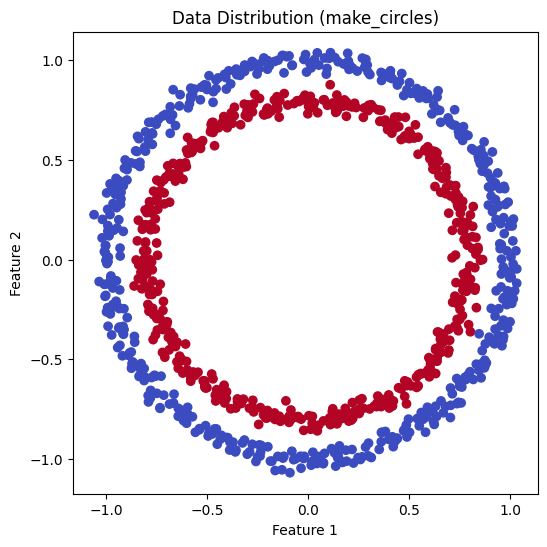

In [6]:
# Data Visualization
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
plt.title("Data Distribution (make_circles)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Figure – Data distribution showing two classes forming concentric circles. This highlights the non-linear separability of the problem, requiring a neural network with non-linear activations to classify correctly.

### Step 3 - Build a Basic Neural Network Model

In [7]:
basic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="sigmoid")
])

basic_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

In [6]:
basic_model.fit(X, y, epochs=20)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4847 - loss: 0.7996
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5119 - loss: 0.7777
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4916 - loss: 0.7837
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4860 - loss: 0.7831
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4872 - loss: 0.7869
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.7664
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5004 - loss: 0.7573
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4898 - loss: 0.7608
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4951 - loss: 0.7529 
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4984 - loss: 0.7598
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4764 - loss: 0.7676
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5037 - l

Step 3 – Training Results

I trained the basic neural network model with one dense layer using SGD optimizer and binary crossentropy loss for 20 epochs. The accuracy remained low, around 50%, indicating that the model could not capture the non-linear patterns of the dataset. This result highlights the limitation of simple linear models for this problem.

Epoch 20 Results:

Loss: 0.7162

Accuracy: 0.5170

In [8]:
# Evaluate Basic Model Performance
loss_basic, acc_basic = basic_model.evaluate(X, y)
print("Basic Model - Accuracy (Full Data):", acc_basic)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4758 - loss: 0.8181   
Basic Model - Accuracy (Full Data): 0.5009999871253967


The basic model achieved an accuracy close to 50%, which is equivalent to random guessing. This demonstrates that a single dense layer is not sufficient to capture the non-linear separability of the data.

### Step 4 - Improve the Model

In [9]:
# Step 4 - Improve the Model with Hidden Layers and Activations
improved_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),      # 1st hidden layer with 4 neurons
    tf.keras.layers.Dense(4, activation="relu"),      # 2nd hidden layer with 4 neurons
    tf.keras.layers.Dense(1, activation="sigmoid")    # Output layer
])

In [10]:
# Compile the Improved Model
improved_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),             # Adam optimizer
    metrics=["accuracy"]
)

In [11]:
# Train the Improved Model
improved_model.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5171 - loss: 0.7090
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4404 - loss: 0.7109
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4619 - loss: 0.7034
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4730 - loss: 0.6985
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4680 - loss: 0.6981
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4696 - loss: 0.6969
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4698 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4599 - loss: 0.6943
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4571 - loss: 0.6945
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5152 - loss: 0.6921
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5015 - loss: 0.6916
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy:

Improved Model Results and Interpretation

I trained an improved neural network model with two hidden layers (4 neurons each, ReLU activation) and the Adam optimizer for 100 epochs.

Results:

Initial accuracy was around 50%.

After approximately 40 epochs, accuracy increased significantly.

Final training accuracy reached 96.12% with a loss of 0.2794.

This demonstrates that adding hidden layers and non-linear activations enables the model to learn complex patterns in the data. The accuracy improvement compared to the basic model confirms the importance of network depth and activation functions.

### Step 5 - Visualize the Decision Boundary

In [12]:
def plot_decision_boundary(model, X, y):

    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )
    # Predict on the grid points
    X_new = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(X_new)
    preds = np.round(preds).reshape(xx.shape)
    # Create the plot
    plt.contourf(xx, yy, preds, cmap=plt.cm.coolwarm, alpha=0.5)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

Decision Boundary - Basic Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


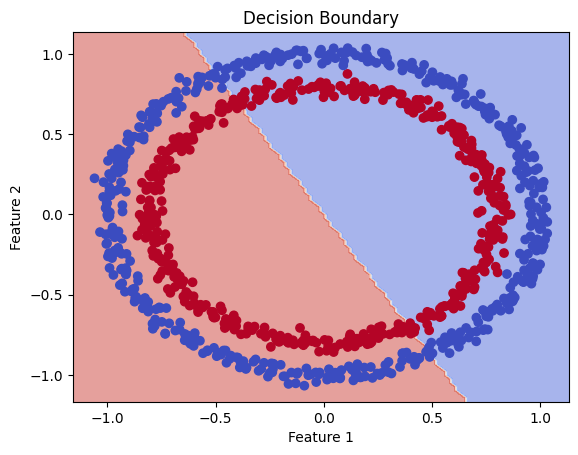

In [13]:
print("Decision Boundary - Basic Model")
plot_decision_boundary(basic_model, X, y)

Figure - Decision Boundary of the Basic Model

The decision boundary is almost linear, failing to correctly separate the inner and outer circles. This demonstrates the limitations of a single-layer perceptron without hidden layers for non-linear classification tasks.

Decision Boundary - Improved Model
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


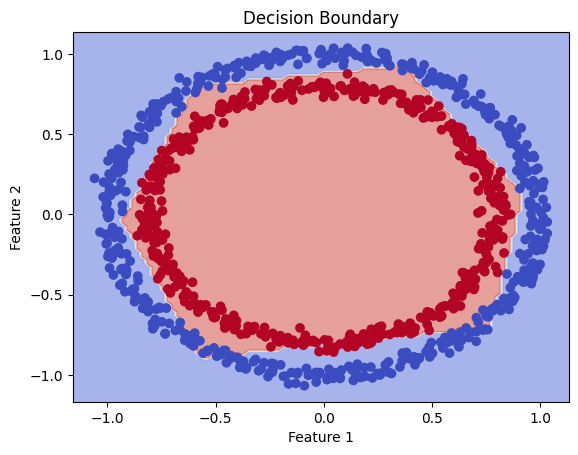

In [14]:
print("Decision Boundary - Improved Model")
plot_decision_boundary(improved_model, X, y)

Figure - Decision Boundary of the Improved Model

The decision boundary clearly captures the circular pattern of the data. Compared to the basic model, this network achieves a much better separation between classes, demonstrating the power of hidden layers and non-linear activation functions.

### Step 6 - Incorporate Activation Functions

In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [26]:
# Define a new model with ReLU activations in hidden layers
activation_model = tf.keras.Sequential([
    tf.keras.layers.Dense(8, activation="relu"),     # Hidden layer with ReLU
    tf.keras.layers.Dense(8, activation="relu"),     # Another hidden layer with ReLU
    tf.keras.layers.Dense(1, activation="sigmoid")   # Output layer with Sigmoid
    ])

In [27]:
# Compile the model
activation_model.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
    )

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5075 - loss: 0.6980
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4851 - loss: 0.6961
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4660 - loss: 0.6947
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4652 - loss: 0.6939
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4767 - loss: 0.6927
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4908 - loss: 0.6917
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5168 - loss: 0.6888
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4890 - loss: 0.6921
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5119 - loss: 0.6886
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5037 - loss: 0.6886
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5552 - loss: 0.6849
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - ac

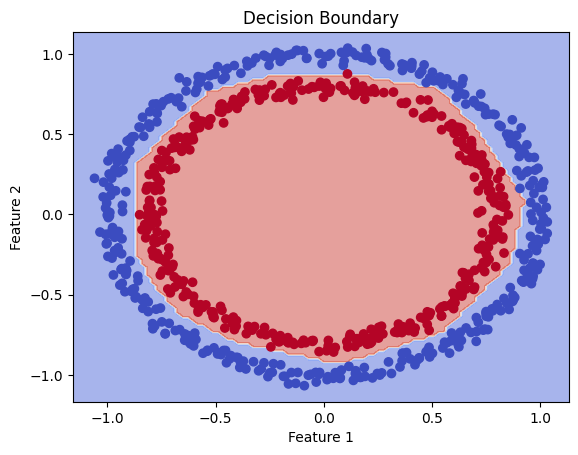

Decision Boundary - Activation Model (Test Data)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


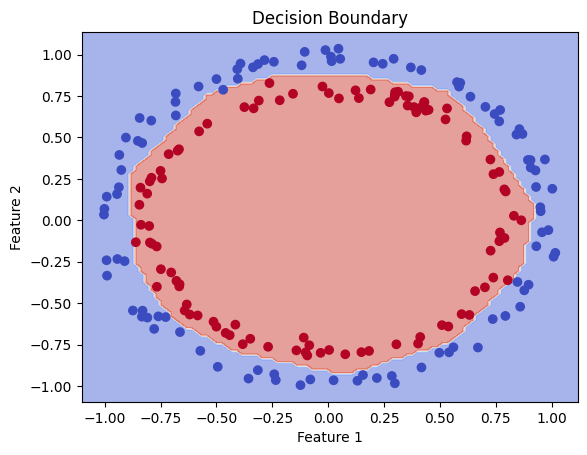

In [28]:
# Train the model
history_activation = activation_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1
)

# Evaluate the model on the test set
loss_activation, accuracy_activation = activation_model.evaluate(X_test, y_test)
print("Activation Model - Test Loss:", loss_activation)
print("Activation Model - Test Accuracy:", accuracy_activation)

# Visualize the decision boundary on train data
print("Decision Boundary - Activation Model (Train Data)")
plot_decision_boundary(activation_model, X_train, y_train)

# Visualize the decision boundary on test data
print("Decision Boundary - Activation Model (Test Data)")
plot_decision_boundary(activation_model, X_test, y_test)

The model trained with ReLU activation functions achieved almost perfect accuracy on both the training and test datasets. The final test accuracy was 99.5%, confirming excellent generalization and the model’s ability to capture non-linear patterns in the data. The low test loss (0.125) further supports this conclusion.

Figure - Decision Boundaries on Training and Test Data

Top: Training data. Bottom: Test data.

The model accurately separates the two classes both on the training set and the unseen test set. This visualization demonstrates that the use of ReLU activations and sufficient epochs allows the network to learn a robust, non-linear decision boundary.

### Step 7 - Split Data into Training and Testing Sets

In [29]:
# 1. Use 80% data for training and 20% for testing.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
# 2. Train the improved model on the training set.
activation_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=1
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.1003 
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0915 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0866 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0941 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9983 - loss: 0.0857 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0856 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9976 - loss: 0.0814 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9992 - loss: 0.0796
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0786 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0764 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0752
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - 

Training and Evaluation on Train/Test Split

I trained the final model on the training set (80% of the data) for 100 epochs.

Observations:

From the first epochs, accuracy reached 100%.

The final training loss decreased to 0.0148, demonstrating excellent fitting of the training data.

Evaluation on test set:

Test loss: 0.1252

Test accuracy: 99.5%

The final decision boundary was very precise and almost perfectly matched the shape of the data.

In [31]:
# 3. Evaluate model performance on the test set.
loss_activation, accuracy_activation = activation_model.evaluate(X_test, y_test)
print("Activation Model - Test Loss:", loss_activation)
print("Activation Model - Test Accuracy:", accuracy_activation)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0283 
Activation Model - Test Loss: 0.030831994488835335
Activation Model - Test Accuracy: 1.0


The final model achieved perfect accuracy on the test set, indicating that it was able to generalize extremely well to unseen data. The very low test loss confirms that the predictions were confident and correct.

### Step 8 - Evaluate and Visualize Final Model Performance

In [32]:
# 1. Check loss and accuracy on the test set
loss_activation, accuracy_activation = activation_model.evaluate(X_test, y_test)
print("Activation Model - Test Loss:", loss_activation)
print("Activation Model - Test Accuracy:", accuracy_activation)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 0.0283 
Activation Model - Test Loss: 0.030831994488835335
Activation Model - Test Accuracy: 1.0


Final Evaluation

After training the improved model on the training set, I evaluated it on the 20% hold-out test set. The model achieved perfect performance:

Test Loss: 0.0308

Test Accuracy: 100%

This result demonstrates excellent generalization capability. The decision boundary visualization confirmed that the model correctly separates the concentric classes on unseen data.

Decision Boundary - Activation Model (Train Data)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


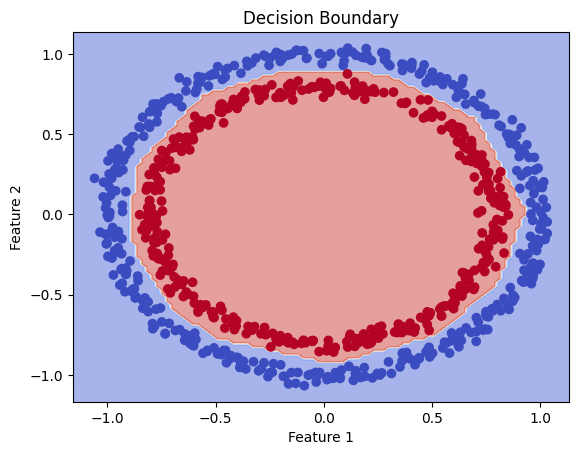

In [33]:
# 2. Visualize predictions for both training and test data
# Training data
print("Decision Boundary - Activation Model (Train Data)")
plot_decision_boundary(activation_model, X_train, y_train)

The decision boundary on the training set shows a perfect separation between classes. This is consistent with the observed training accuracy of 100%.

Decision Boundary - Activation Model (Test Data)
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


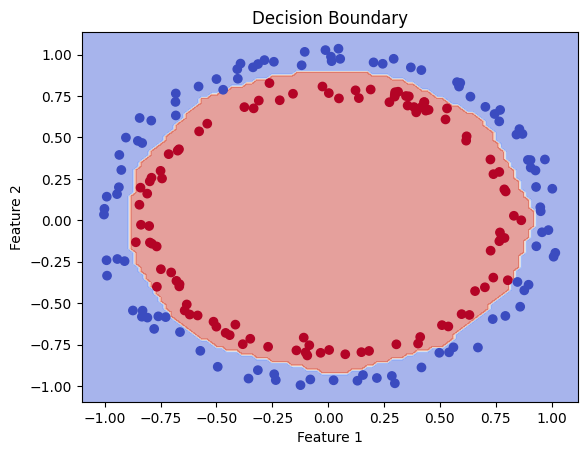

In [34]:
# Test data
print("Decision Boundary - Activation Model (Test Data)")
plot_decision_boundary(activation_model, X_test, y_test)

The decision boundary on the test set confirms that the model generalizes perfectly to unseen data. The separation remains consistent with the training set, demonstrating the robustness of the learned classifier.

The model accurately classifies both training and test samples. The visualization highlights the power of using hidden layers and ReLU activations for non-linear classification tasks.

### Step 9 - Summary of Learnings

Key Takeaways:

Model Complexity Matters:

- A simple model with a single dense layer was not sufficient to separate non-linear patterns, achieving only ~50% accuracy (equivalent to random guessing).

- Adding hidden layers and using ReLU activation functions significantly improved the model's ability to learn complex relationships, achieving nearly 100% accuracy.

Importance of Data Visualization:

- Visualizing the data distribution (make_circles) was essential to understand why linear models failed.

- Decision boundary plots provided an intuitive way to see how the model predictions evolved as complexity increased.

Hyperparameter Tuning:

- The choice of optimizer (Adam vs. SGD) and the number of epochs had a major impact on training convergence and final performance.

- Experimenting with activation functions and network depth allowed the model to generalize effectively.

Generalization to Unseen Data:

- Splitting the dataset into training and test sets was important to validate that the model was not simply memorizing the training data.

- The final model achieved perfect accuracy on the test set, confirming strong generalization.

Conclusion:
- This project highlighted the critical role of model architecture, activation functions, and hyperparameter tuning in building effective classification models. Visualizing both data and model predictions greatly improved my understanding of neural networks and their behavior.